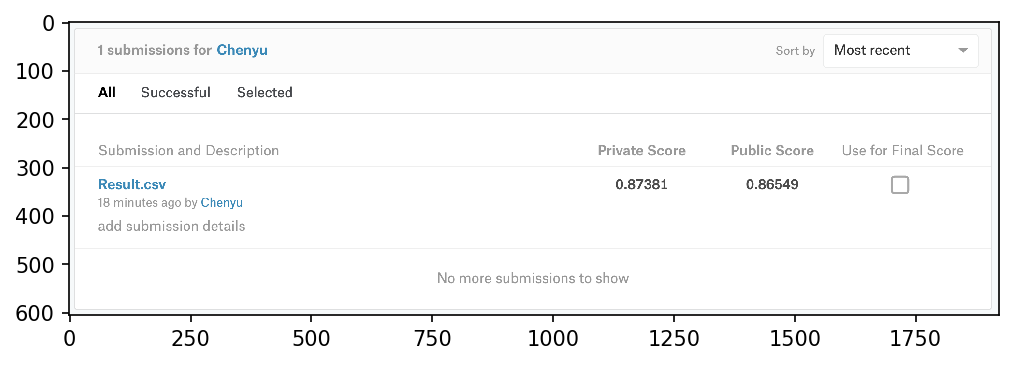

In [166]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=150)
import matplotlib.pyplot as plt
import skimage.io as skio
img1 = skio.imread('pic.png')
plt.imshow(img1)
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [146]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
label = pd.read_csv('trainLabels.csv')

train = train.values
test = test.values
label = label.values.flatten()

In [147]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=4)

# 建立模型
clf = GradientBoostingClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [148]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.87


In [149]:
learning_rate = [0.1, 0.2, 0.05, 0.01, 0.3]
n_estimators = [50, 75, 100, 125, 150]
max_depth = [1, 3, 5, 7, 9]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)

grid_result = grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 125 candidates, totalling 375 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:   36.6s finished


In [160]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.best_params_

Best Accuracy: 0.888889 using {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}

In [152]:
clf_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'],
                                          learning_rate=grid_result.best_params_['learning_rate'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

In [153]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.88


In [154]:
final_pred = clf_bestparam.predict(test)

In [159]:
final_pred = clf_bestparam.predict(test)
ans = []

for i in range(len(final_pred)):
    ans.append(i+1)

df = {"Id" : ans,
      "Solution" : list(final_pred)}

df = pd.DataFrame(df)
df.to_csv('Result.csv')